# age prediction:

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Convolution2D

In [4]:
from tensorflow.keras.layers import MaxPooling2D

In [5]:
from tensorflow.keras.layers import Flatten

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
Classifier=Sequential()

In [9]:
Classifier.add(Convolution2D(32,3,3,input_shape=(200,200,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(4, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 66, 66, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               819456    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./128,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./128)

In [13]:
training_set=train_datagen.flow_from_directory('Dataset/train',target_size=(200,200),batch_size=32,class_mode='categorical')

Found 2300 images belonging to 4 classes.


In [14]:
test_set=test_datagen.flow_from_directory('Dataset/test',target_size=(200,200),batch_size=32,class_mode='categorical')

Found 427 images belonging to 4 classes.


In [15]:
from IPython.display import display

In [18]:
img_dims = 150
epochs = 100
batch_size = 32

In [19]:
history = Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/100
71/71 [==============================] - 22s 308ms/step - loss: 1.3505 - accuracy: 0.3446 - val_loss: 1.2336 - val_accuracy: 0.4952
Epoch 2/100
71/71 [==============================] - 22s 304ms/step - loss: 1.2215 - accuracy: 0.4462 - val_loss: 1.0698 - val_accuracy: 0.5865
Epoch 3/100
71/71 [==============================] - 21s 291ms/step - loss: 1.1417 - accuracy: 0.4982 - val_loss: 1.1143 - val_accuracy: 0.4928
Epoch 4/100
71/71 [==============================] - 21s 293ms/step - loss: 1.0823 - accuracy: 0.5344 - val_loss: 0.9461 - val_accuracy: 0.6226
Epoch 5/100
71/71 [==============================] - 21s 295ms/step - loss: 1.0602 - accuracy: 0.5520 - val_loss: 0.9211 - val_accuracy: 0.6202
Epoch 6/100
71/71 [==============================] - 21s 293ms/step - loss: 1.0572 - accuracy: 0.5556 - val_loss: 1.0532 - val_accuracy: 0.5385
Epoch 7/100
71/71 [==============================] - 21s 303ms/step - loss: 0.9854 - accuracy: 0.5895 - val_loss: 0.8273 - val_accuracy:

71/71 [==============================] - 21s 297ms/step - loss: 0.3912 - accuracy: 0.8532 - val_loss: 0.3724 - val_accuracy: 0.8726
Epoch 58/100
71/71 [==============================] - 21s 297ms/step - loss: 0.3660 - accuracy: 0.8571 - val_loss: 0.4352 - val_accuracy: 0.8149
Epoch 59/100
71/71 [==============================] - 21s 300ms/step - loss: 0.3853 - accuracy: 0.8523 - val_loss: 0.3500 - val_accuracy: 0.8870
Epoch 60/100
71/71 [==============================] - 21s 300ms/step - loss: 0.3710 - accuracy: 0.8576 - val_loss: 0.4295 - val_accuracy: 0.8413
Epoch 61/100
71/71 [==============================] - 22s 311ms/step - loss: 0.3605 - accuracy: 0.8611 - val_loss: 0.3774 - val_accuracy: 0.8894
Epoch 62/100
71/71 [==============================] - 22s 309ms/step - loss: 0.3763 - accuracy: 0.8567 - val_loss: 0.3478 - val_accuracy: 0.8726
Epoch 63/100
71/71 [==============================] - 22s 305ms/step - loss: 0.3612 - accuracy: 0.8563 - val_loss: 0.3386 - val_accuracy: 0.887

In [68]:
import matplotlib.pyplot as plt

In [69]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

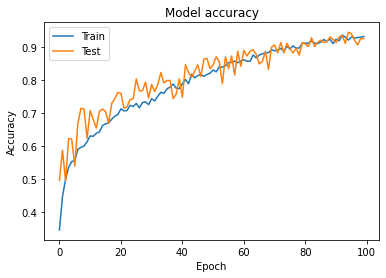

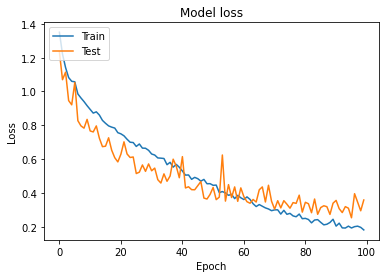

In [70]:
graph()

In [23]:
import h5py

In [24]:
Classifier.save('age.h5')
       

In [25]:
from keras.models import load_model

In [26]:
model=load_model('age.h5')

In [27]:
import numpy as np

In [144]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('42.jpg',target_size=(200,200))

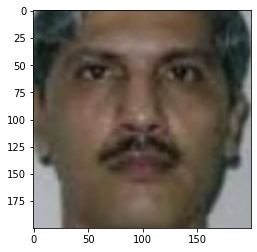

In [145]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [146]:
test_image=image.img_to_array(test_image)

In [147]:
test_image=np.expand_dims(test_image,axis=0)

In [148]:
result=model.predict(test_image)

In [149]:
prediction = result[0]

In [150]:
classes=training_set.class_indices

In [151]:
classes

{'25-30': 0, '42-48': 1, '6-20': 2, '60-98': 3}

In [152]:
prediction=list(prediction)

In [153]:
prediction

[0.0, 1.0, 0.0, 0.0]

In [154]:
classes=['25-30','42-48','6-20','60-98']

In [155]:
output=zip(classes,prediction)

In [156]:
output=dict(output)

In [157]:
output

{'25-30': 0.0, '42-48': 1.0, '6-20': 0.0, '60-98': 0.0}

In [158]:
if output['25-30']==1.0:
    print("25-30")
elif output['42-48']==1.0:
    print("42-48")
elif output['6-20']==1.0:
    print("6-20")
elif output['60-98']==1.0:
    print("60-98")

42-48
